<a href="https://colab.research.google.com/github/Kotzly/DS4H_Course/blob/dev_e2/notebooks/DS4H_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Kotzly/DS4H_Course.git
!pip install ./DS4H_Course

Cloning into 'DS4H_Course'...
remote: Enumerating objects: 385, done.
remote: Counting objects: 100% (385/385), done.
remote: Compressing objects: 100% (279/279), done.
remote: Total 385 (delta 230), reused 203 (delta 93), pack-reused 0
Receiving objects: 100% (385/385), 1.87 MiB | 10.06 MiB/s, done.
Resolving deltas: 100% (230/230), done.
Processing ./DS4H_Course
     |████████████████████████████████| 9.5MB 26.4MB/s 
  Created wheel for ds4h: filename=ds4h-0.1-cp37-none-any.whl size=12213 sha256=c468e1d67b5541744ecbff03a184400cd0ce542cfa421ba650e399a13a8f5df1
  Stored in directory: /tmp/pip-ephem-wheel-cache-l6s8id35/wheels/ec/ff/91/fc3664f800ce643b3917437b9c8d3b0b7298db38297e3d6ef4
  Created wheel for zipfile38: filename=zipfile38-0.0.3-cp37-none-any.whl size=22765 sha256=eff30316399240980a61ff41c7b3c6bd85a648e1f5eae5050e6bb5a26f9fcb60
  Stored in directory: /root/.cache/pip/wheels/15/7a/ec/508d28bf3894e050aef4d0205cdf27a346e6e0891e979345d4
  Created wheel for simpledbf: filename=si

In [2]:
import ds4h
from ds4h.data.download_sinasc import download_dbc, download_dbf_2020
from ds4h.processing.dbc import dbc_to_csv, dbf_to_csv
from ds4h.processing.csv import join_sinasc_files
from ds4h.processing.sinasc import process_sinasc

from pathlib import Path
from ds4h.data.city_ranking import get_ranking_dataframe, get_top_cities_from_df

In [3]:
dataset_root = Path("/home/paulo/Documents/datasets/sinasc")

In [4]:
dbc_path = dataset_root / "dbc"

dbc_path.mkdir(exist_ok=True, parents=True)

In [5]:
download_dbc(dbc_path, n_jobs=11)

In [6]:
csv_path = dataset_root / "csv"
dbc_to_csv(dbc_path, csv_path);

gcc -std=gnu99 -I"/usr/share/R/include" -DNDEBUG      -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-wP4Uzq/r-base-4.0.5=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c blast.c -o blast.o
gcc -std=gnu99 -I"/usr/share/R/include" -DNDEBUG      -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-wP4Uzq/r-base-4.0.5=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c dbc2dbf.c -o dbc2dbf.o
gcc -std=gnu99 -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o read.dbc.so blast.o dbc2dbf.o -L/usr/lib/R/lib -lR
[1] "/home/paulo/Documents/datasets/sinasc/dbc//DNSP2010.dbc"
[1] "/home/paulo/Documents/datasets/sinasc/dbc//DNSP2011.dbc"
[1] "/home/paulo/Documents/datasets/sinasc/dbc//DNSP2012.dbc"
[1] "/home/paulo/Documents/datasets/sinasc/dbc//DNSP2013.dbc"
[1] "/home/paulo/Documents/datasets/sinasc/dbc//DNSP2014.dbc"
[1] "/home/paulo/Documents/datasets/sinasc/dbc//DNSP2015.dbc"
[1] "/home/pau

In [7]:
dbf_folder = dataset_root / "dbf"
dbf_folder.mkdir(exist_ok=True)

download_dbf_2020(dbf_folder)

dbf_filepath = list(dbf_folder.glob("*.DBF"))[0]
dbf_to_csv(dbf_filepath, csv_path)

In [8]:
union_df = join_sinasc_files(csv_path)
union_df

Loading DNSP2017.csv
Loading DNSP2011.csv
Loading DNSP2018.csv
Loading DNSP2015.csv
Loading DNSP2019.csv
Loading DNSP2013.csv
Loading DNSP2010.csv
Loading DNBR20DA.csv
Loading DNSP2012.csv
Loading DNSP2014.csv
Loading DNSP2016.csv


,CODMUNNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,PARTO,DTNASC,RACACOR,IDANOMAL,RACACORMAE
0,150140,18.0,1.0,4.0,NaN,NaN,5.0,2.0,17062017,4.0,2.0,4.0
1,170950,13.0,1.0,3.0,0.0,0.0,4.0,1.0,17012017,4.0,2.0,4.0
2,172100,17.0,5.0,4.0,0.0,0.0,5.0,2.0,6032017,4.0,2.0,4.0
3,210675,19.0,1.0,4.0,1.0,0.0,5.0,2.0,25032017,4.0,2.0,4.0
4,211230,24.0,1.0,4.0,2.0,0.0,5.0,2.0,16022017,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
601432,350320,36.0,NaN,NaN,NaN,NaN,5.0,1.0,26052016,NaN,2.0,NaN
601433,351620,27.0,NaN,NaN,NaN,NaN,4.0,2.0,5022016,NaN,2.0,NaN
601434,351620,27.0,NaN,NaN,NaN,NaN,4.0,2.0,5022016,NaN,2.0,NaN
601435,351620,38.0,NaN,NaN,NaN,NaN,4.0,2.0,5022016,NaN,2.0,NaN


In [9]:
df = get_ranking_dataframe()
cities_dict = get_top_cities_from_df(df)
print(cities_dict)

{354880: 'São Caetano do Sul', 351440: 'Dracena', 352480: 'Jales', 354680: 'Santa Isabel', 350210: 'Andradina', 354980: 'São Josã do Rio Preto', 354850: 'Santos', 350570: 'Barueri', 351740: 'Guaãra', 350280: 'Araãatuba', 355030: 'São Paulo'}


In [10]:
union_df.columns

Index(['CODMUNNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',
       'QTDFILMORT', 'GESTACAO', 'PARTO', 'DTNASC', 'RACACOR', 'IDANOMAL',
       'RACACORMAE'],
      dtype='object')

In [11]:
df = process_sinasc(union_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # we have an equal len list/ndarray


In [12]:
import numpy as np
def null_proportion(df):
  def null_prop(series):
    mp = np.isnan(series.values).mean()
    return "{:.1f}%".format(mp * 100)
  return df.apply(null_prop, axis=0)

null_proportion(union_df)

CODMUNNASC     0.0%
IDADEMAE       0.0%
ESTCIVMAE      0.4%
ESCMAE         0.5%
QTDFILVIVO     1.9%
QTDFILMORT     3.0%
GESTACAO       0.7%
PARTO          0.1%
DTNASC         0.0%
RACACOR        1.5%
IDANOMAL       0.5%
RACACORMAE    14.9%
dtype: object

In [13]:
union_df.head()

,CODMUNNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,PARTO,DTNASC,RACACOR,IDANOMAL,RACACORMAE
0,150140,18.0,1.0,4.0,NaN,NaN,5.0,2.0,17062017,4.0,2.0,4.0
1,170950,13.0,1.0,3.0,0.0,0.0,4.0,1.0,17012017,4.0,2.0,4.0
2,172100,17.0,5.0,4.0,0.0,0.0,5.0,2.0,6032017,4.0,2.0,4.0
3,210675,19.0,1.0,4.0,1.0,0.0,5.0,2.0,25032017,4.0,2.0,4.0
4,211230,24.0,1.0,4.0,2.0,0.0,5.0,2.0,16022017,4.0,2.0,4.0


In [14]:
raw_df = union_df

In [15]:
df["YEAR"] = df.DTNASC.dt.year
df["MONTH"] = df.DTNASC.dt.month
df["DAY"] = df.DTNASC.dt.day
df

,CODMUNNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,PARTO,DTNASC,RACACOR,IDANOMAL,RACACORMAE,MUNNAME,YEAR,MONTH,DAY
4380,350280,34.0,1.0,4.0,1.0,0.0,5.0,2.0,2017-01-05,1.0,2.0,1.0,Araçatuba,2017,1,5
4381,350280,36.0,2.0,4.0,1.0,2.0,5.0,2.0,2017-01-09,1.0,2.0,1.0,Araçatuba,2017,1,9
4382,350280,32.0,1.0,5.0,0.0,0.0,5.0,2.0,2017-01-09,4.0,2.0,4.0,Araçatuba,2017,1,9
4383,350280,32.0,2.0,5.0,0.0,0.0,5.0,2.0,2017-01-05,1.0,2.0,1.0,Araçatuba,2017,1,5
4384,350280,30.0,2.0,5.0,1.0,0.0,5.0,2.0,2017-01-02,1.0,2.0,1.0,Araçatuba,2017,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586243,355030,26.0,1.0,2.0,4.0,0.0,5.0,1.0,2016-12-14,5.0,2.0,5.0,São Paulo,2016,12,14
586244,355030,29.0,5.0,4.0,1.0,0.0,5.0,1.0,2016-12-08,1.0,2.0,1.0,São Paulo,2016,12,8
586245,355030,18.0,1.0,4.0,1.0,0.0,5.0,1.0,2016-11-19,1.0,2.0,1.0,São Paulo,2016,11,19
586246,355030,30.0,1.0,5.0,1.0,0.0,5.0,1.0,2016-09-16,1.0,2.0,1.0,São Paulo,2016,9,16


In [16]:
translate_dict = {
  "MONTH": {
      1: "January",
      2: "February",
      3: "March",
      4: "April",
      5: "May",
      6: "June",
      7: "July",
      8: "August",
      9: "Septembet",
      10: "October",
      11: "November",
      12: "December"
  },
  "ESTCIVMAE": {
      1: "Single",
      2: "Married",
      3: "Widowed",
      4: "Divorced",
      5: "Stable union",
      9: "Unknown"
  },
  "RACACOR": {
      1: "White",
      2: "Black",
      3: "Asian",
      4: "Brown (Parda)",
      5: "Indigenous"
  },
  "RACACORMAE": {
      1: "White",
      2: "Black",
      3: "Asian",
      4: "Brown (Parda)",
      5: "Indigenous"
  },
  "IDANOMAL": {
      1: "Yes",
      2: "No",
      9: "Unknown"
  },
  # "ESCMAE2010": {
  #     0: "None",
  #     1: "Fundamental I",
  #     2: "Fundamental II",
  #     3: "Ensino Médio",
  #     4: "Ensino superior incompleto",
  #     5: "Ensino superior completo",
  #     9: "Unknown"
  # },
  "ESCMAE": {
      1: "None",
      2: "1 to 3 years",
      3: "4 to 7 years",
      4: "8 to 11 years",
      5: "12 or more years",
      9: "Unknown"
  },
  "PARTO": {
      1: "Vaginal",
      2: "Cesarean",
      9: "Unknown"
  }
}
for col in translate_dict.keys():
  df.loc[:, col] = df[col].apply(translate_dict[col].get) 

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def pct_lineplot(df, x_col, group_col, percentage=True, y_logscale=False):
  plt.figure(figsize=(14, 5))
  ax = plt.gca()
  ax.grid()
  order = list(translate_dict[x_col].values()) if x_col in translate_dict else None
  hue_order = list(translate_dict[group_col].values()) if group_col in translate_dict else None
  if percentage:
    pct2 = (100 * df.groupby([x_col, group_col]).size() / df.groupby([x_col]).size()).reset_index().rename({0:'percent'}, axis=1)
    plot = sns.lineplot(x=x_col, hue=group_col, y='percent', data=pct2, ax=ax, hue_order=hue_order)
    ticks = ax.get_yticks()
    ax.set_yticklabels([f"{x}%" for x in ticks])
  else:
    plot = sns.lineplot(data=df, x=x_col, hue=group_col, ax=ax, hue_order=hue_order)

  if y_logscale:
    ax.set_yscale("log")

  ax.set_ylabel("Count" if percentage else "Percentage [%]")
  ax.set_xlabel(x_col)

  ax.set_title(f"Count per {x_col} stratified by {group_col}")
  ax.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

  plt.show()
  plt.close()

def pct_plot(df, x_col, group_col, percentage=True, y_logscale=False):
  plt.figure(figsize=(14, 5))
  ax = plt.gca()
  ax.grid()
  order = list(translate_dict[x_col].values()) if x_col in translate_dict else None
  hue_order = list(translate_dict[group_col].values()) if group_col in translate_dict else None
  if percentage:
    pct2 = (100 * df.groupby([x_col, group_col]).size() / df.groupby([x_col]).size()).reset_index().rename({0:'percent'}, axis=1)
    plot = sns.barplot(x=x_col, hue=group_col, y='percent', data=pct2, ax=ax, order=order, hue_order=hue_order)
    ticks = ax.get_yticks()
    ax.set_yticklabels([f"{x}%" for x in ticks])
  else:
    plot = sns.countplot(data=df, x=x_col, hue=group_col, ax=ax, order=order, hue_order=hue_order)

  if y_logscale:
    ax.set_yscale("log")

  ax.set_ylabel("Count" if percentage else "Percentage [%]")
  ax.set_xlabel(x_col)

  ax.set_title(f"Count per {x_col} stratified by {group_col}")
  ax.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)


  plt.show()
  plt.close()

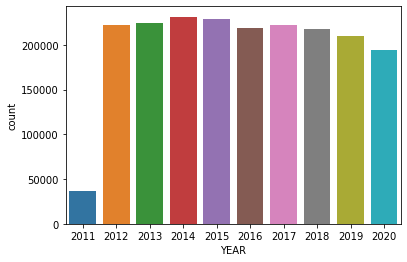

In [18]:
sns.countplot(data=df, x="YEAR")

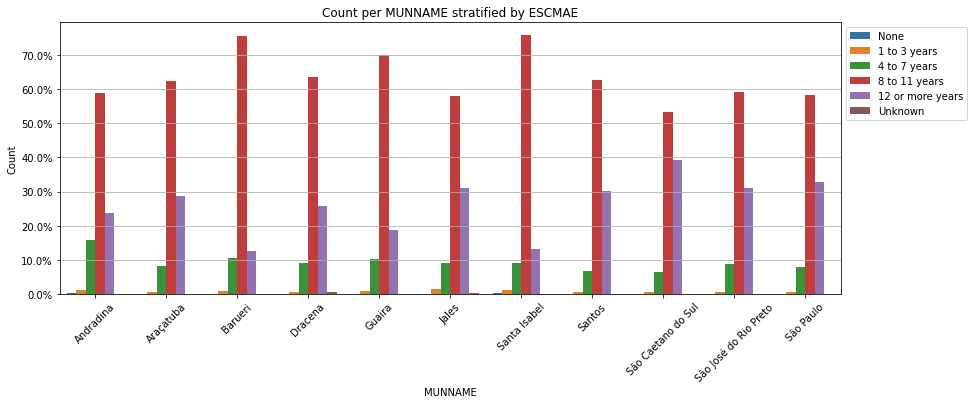

In [19]:
pct_plot(df, "MUNNAME", "ESCMAE", percentage=True)

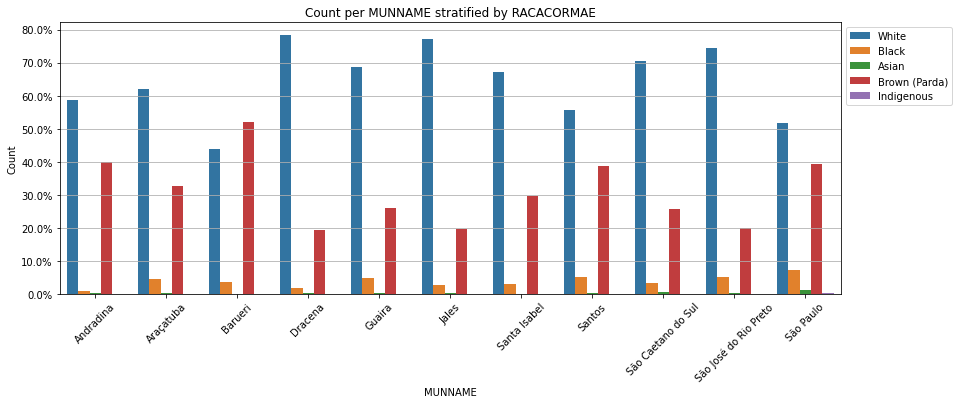

In [20]:
pct_plot(df, "MUNNAME", "RACACORMAE", percentage=True)

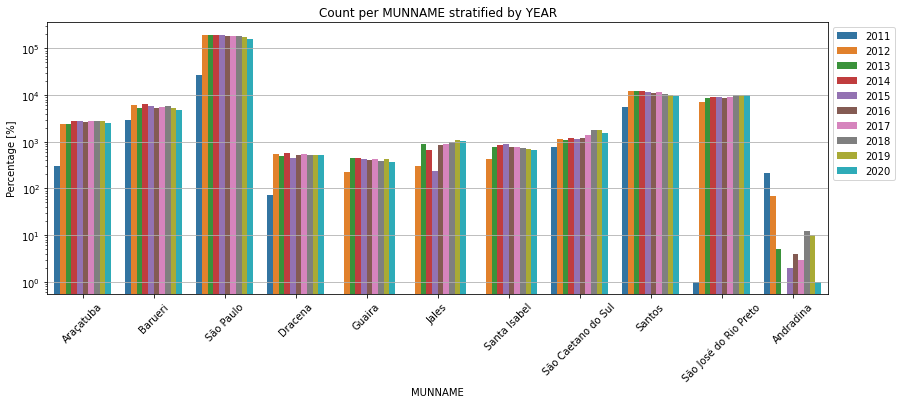

In [21]:
pct_plot(df, "MUNNAME", "YEAR", percentage=False, y_logscale=True)

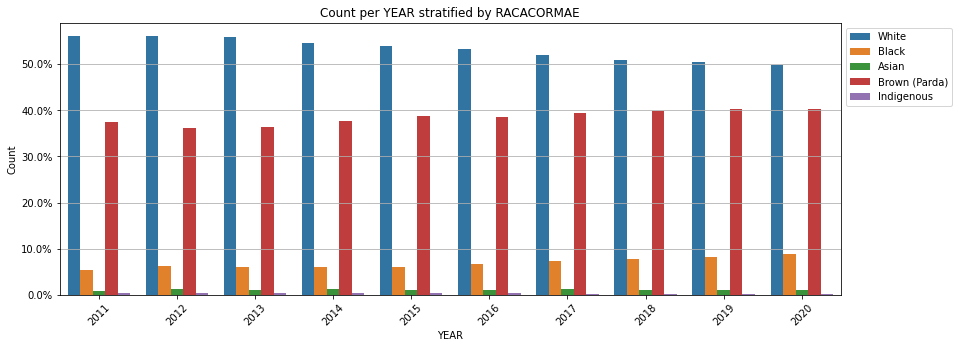

In [22]:
pct_plot(df, "YEAR", "RACACORMAE", percentage=True)

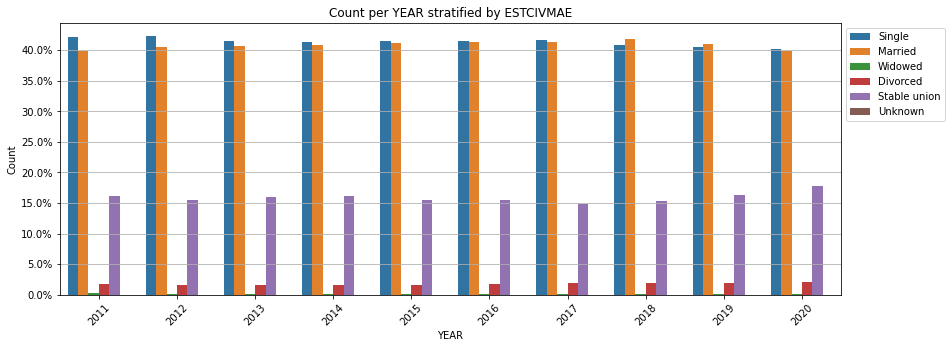

In [23]:
pct_plot(df, "YEAR", "ESTCIVMAE", percentage=True)

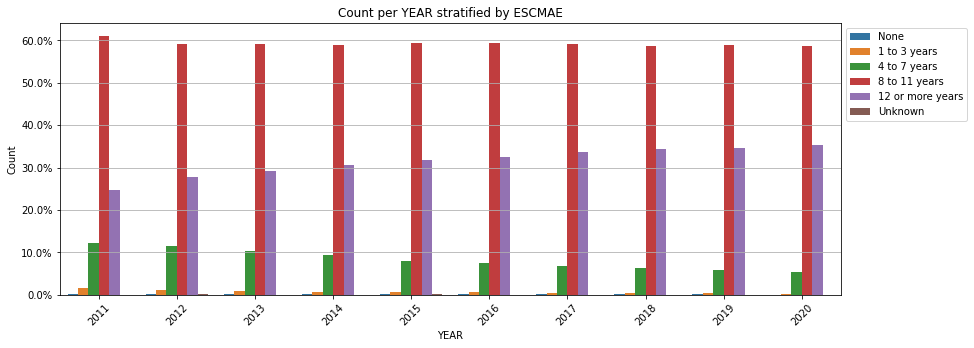

In [24]:
pct_plot(df, "YEAR", "ESCMAE", percentage=True)

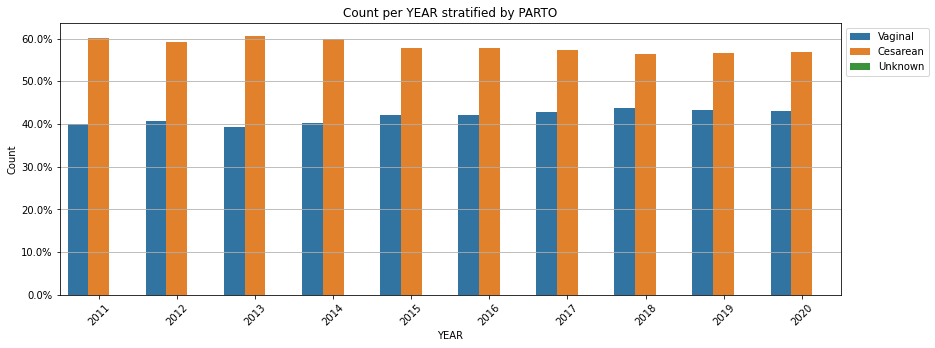

In [25]:
pct_plot(df, "YEAR", "PARTO", percentage=True)

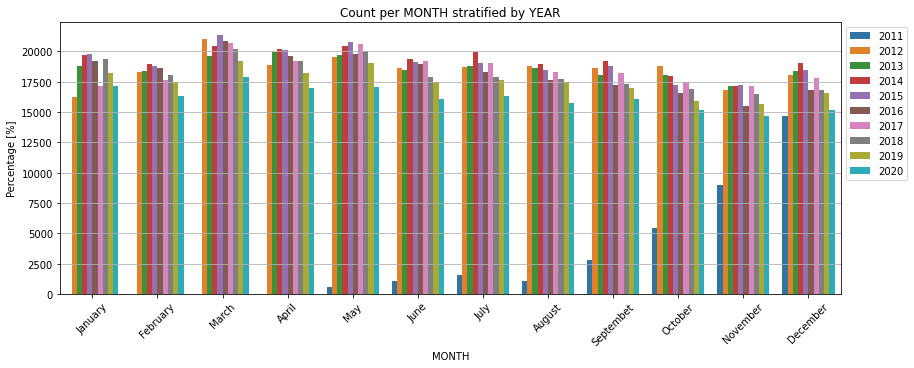

In [26]:
pct_plot(df, "MONTH", "YEAR", percentage=False)

# 2020

In [27]:
df2020 = df[df.YEAR == 2020]

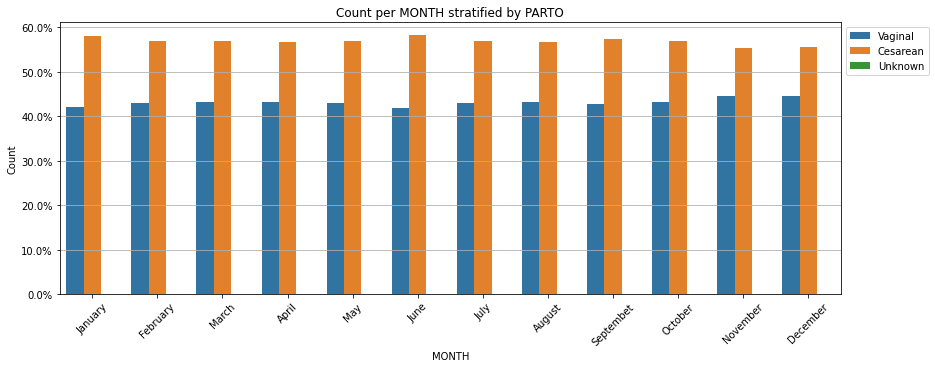

In [28]:
pct_plot(df2020, "MONTH", "PARTO", percentage=True)

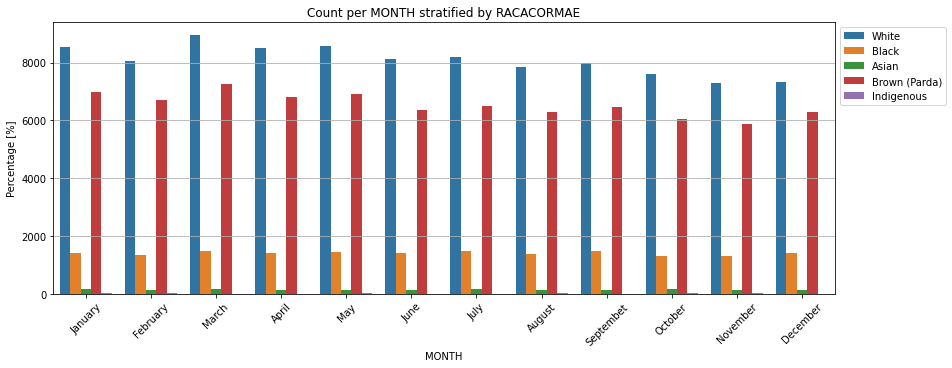

In [29]:
pct_plot(df2020, "MONTH", "RACACORMAE", percentage=False)

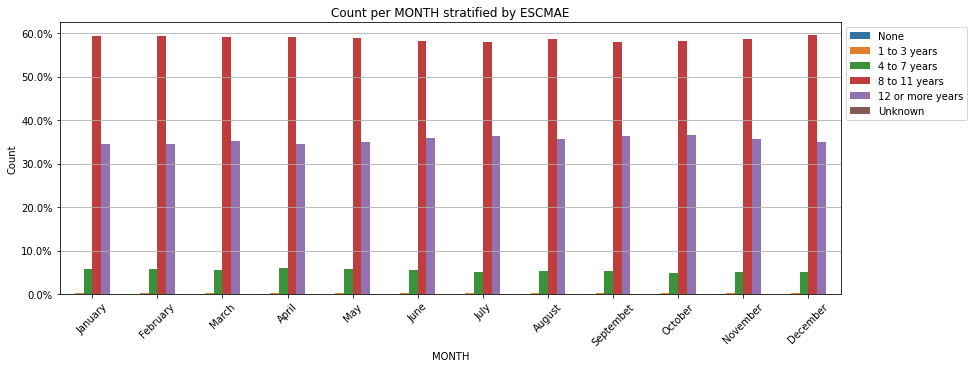

In [30]:
pct_plot(df2020, "MONTH", "ESCMAE", percentage=True)

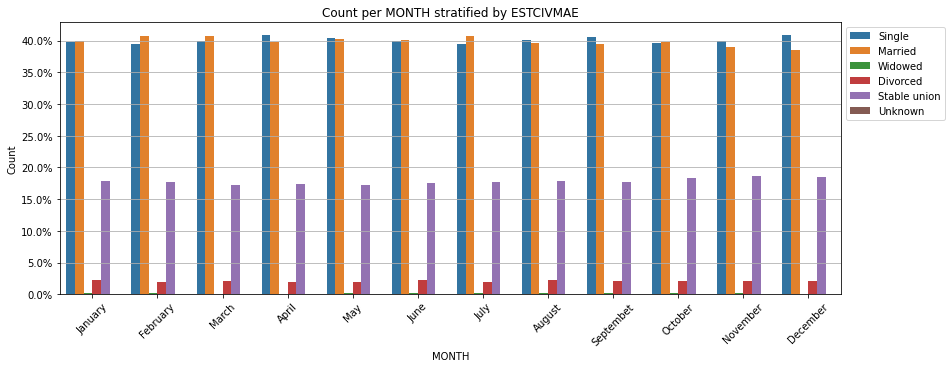

In [31]:
pct_plot(df2020, "MONTH", "ESTCIVMAE", percentage=True)

In [32]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
pearson_pairs = [
  ["IDADEMAE"]
]
spearman_pairs = [
  ["IDADEMAE", "ESCMAE"],
  ["IDADEMAE", "QTDFILVIVO"],
  ["IDADEMAE", "QTDFILMORTO"],
  ["IDADEMAE", "GESTACAO"],
]
cat_num_pairs = [
  "DTNASC"
]
cat_pairs = [
  ["PARTO", "YEAR"],
  ["PARTO", "YEAR"],
  ["PARTO", "YEAR"],
  
]
raw_df.corr().loc[
  ["DTNASC", "IDADEMAE"]
]

,CODMUNNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,PARTO,DTNASC,RACACOR,IDANOMAL,RACACORMAE
DTNASC,0.000820,-0.001732,0.000001,-0.001366,0.000217,0.000081,0.002666,-0.000664,1.000000,0.001448,-0.000457,0.000541
IDADEMAE,0.057251,1.000000,0.070540,0.183689,0.148808,0.025692,-0.021375,0.211375,-0.001732,-0.108463,-0.010155,-0.123471
